In [1]:
import numpy as np
import pandas as pd

from kmeans import Kmeans
from metrics import *
from encode import onehotencode

In [2]:
df = pd.read_csv('top5drugs_encoded.csv')
df

,Unnamed: 0,specialty,years_practicing,cms_prescription_counts,encoded
0,0,Nephrology,7,HYDROCODONE GABAPENTIN OMEPRAZOLE LISINOPRIL L...,"[0, 1, 1, 1, 1]"
1,1,General Practice,7,AMOXICILLIN HYDROCODONE,"[1, 0, 1, 0, 0]"
2,2,General Practice,7,AMOXICILLIN,"[1, 0, 0, 0, 0]"
3,3,General Practice,7,AMOXICILLIN,"[1, 0, 0, 0, 0]"
4,4,Nephrology,6,HYDROCODONE OMEPRAZOLE LISINOPRIL AMOXICILLIN ...,"[1, 1, 1, 1, 1]"
...,...,...,...,...,...
175922,239924,General Practice,6,AMOXICILLIN HYDROCODONE,"[1, 0, 1, 0, 0]"
175923,239925,Family,7,LISINOPRIL LISINOPRIL OMEPRAZOLE,"[0, 0, 0, 1, 1]"
175924,239927,Psych/Mental Health,3,GABAPENTIN,"[0, 1, 0, 0, 0]"
175925,239928,Family,2,AMOXICILLIN LISINOPRIL LISINOPRIL,"[1, 0, 0, 1, 0]"


In [3]:
encoded = np.load('top5encoded.npy')

In [4]:
df

,Unnamed: 0,specialty,years_practicing,cms_prescription_counts,encoded
0,0,Nephrology,7,HYDROCODONE GABAPENTIN OMEPRAZOLE LISINOPRIL L...,"[0, 1, 1, 1, 1]"
1,1,General Practice,7,AMOXICILLIN HYDROCODONE,"[1, 0, 1, 0, 0]"
2,2,General Practice,7,AMOXICILLIN,"[1, 0, 0, 0, 0]"
3,3,General Practice,7,AMOXICILLIN,"[1, 0, 0, 0, 0]"
4,4,Nephrology,6,HYDROCODONE OMEPRAZOLE LISINOPRIL AMOXICILLIN ...,"[1, 1, 1, 1, 1]"
...,...,...,...,...,...
175922,239924,General Practice,6,AMOXICILLIN HYDROCODONE,"[1, 0, 1, 0, 0]"
175923,239925,Family,7,LISINOPRIL LISINOPRIL OMEPRAZOLE,"[0, 0, 0, 1, 1]"
175924,239927,Psych/Mental Health,3,GABAPENTIN,"[0, 1, 0, 0, 0]"
175925,239928,Family,2,AMOXICILLIN LISINOPRIL LISINOPRIL,"[1, 0, 0, 1, 0]"


In [5]:
df['encoded'].str[1:-1].str.split(', ').values

array([list(['0', '1', '1', '1', '1']), list(['1', '0', '1', '0', '0']),
       list(['1', '0', '0', '0', '0']), ...,
       list(['0', '1', '0', '0', '0']), list(['1', '0', '0', '1', '0']),
       list(['1', '0', '0', '0', '0'])], dtype=object)

In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [7]:
pca = PCA(n_components=2)

In [8]:
coords = pca.fit_transform(encoded)

In [9]:
np.unique(encoded, axis=0).shape

(31, 5)

In [13]:
import matplotlib.pyplot as plt
from contextlib import redirect_stdout

with open('calc.txt', 'w', encoding="utf-8") as f:
    with redirect_stdout(f):
        km = Kmeans(2, metric=euclid_distance)
        km.fit(encoded)
        df['cluster'] = km.labels

KeyboardInterrupt: 

In [ ]:
df['cluster']

0         1
1         0
2         0
3         0
4         1
         ..
175922    0
175923    1
175924    0
175925    0
175926    0
Name: cluster, Length: 175927, dtype: int64

In [ ]:
for label, clr in zip(df['cluster'].value_counts().index, ['r', 'b']):
    print(label)
    cl_idx = (df['cluster'] == label)
    plt.scatter(coords[cl_idx, 0], coords[cl_idx, 1], c=[clr])
plt.scatter(km.centroids[:, 0], km.centroids[:, 1], c='0')

0
1


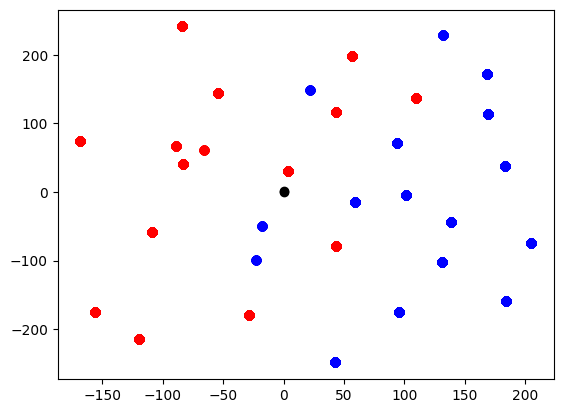

In [18]:

for label, clr in zip(df['cluster'].value_counts().index, ['r', 'b']):
    print(label)
    cl_idx = (df['cluster'] == label)
    plt.scatter(coords[cl_idx, 0], coords[cl_idx, 1], c=[clr])
plt.scatter(km.centroids[:, 0], km.centroids[:, 1], c='0')

0
1


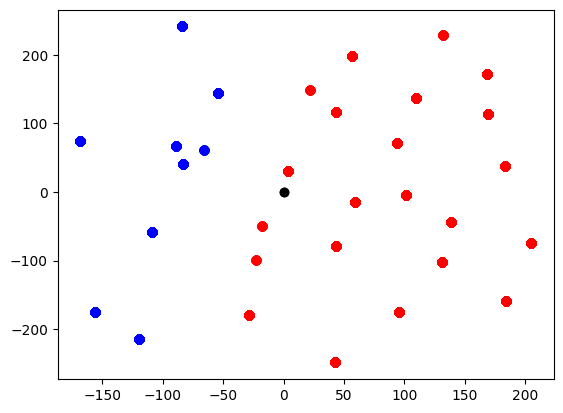

In [16]:

for label, clr in zip(df['cluster'].value_counts().index, ['r', 'b']):
    print(label)
    cl_idx = (df['cluster'] == label)
    plt.scatter(coords[cl_idx, 0], coords[cl_idx, 1], c=[clr])
plt.scatter(km.centroids[:, 0], km.centroids[:, 1], c='0')

  1%|          | 1/100 [00:03<05:08,  3.12s/it]

[[0.07668167 0.59493468 0.35203585 0.57388933 0.54973581]
 [0.69482872 0.00370127 0.52098701 0.00804568 0.05410159]]


  2%|▏         | 2/100 [00:06<04:57,  3.03s/it]

[[0.07746747 0.58057106 0.37144309 0.56166606 0.56418803]
 [0.71526363 0.00306957 0.49990492 0.00532421 0.01676038]]


  2%|▏         | 2/100 [00:09<07:46,  4.76s/it]


[[0.07746747 0.58057106 0.37144309 0.56166606 0.56418803]
 [0.71526363 0.00306957 0.49990492 0.00532421 0.01676038]]
0
1


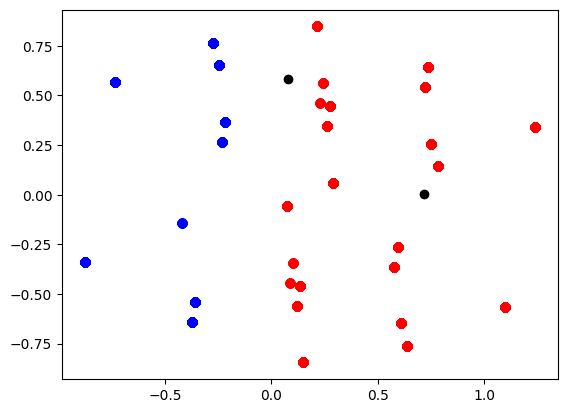

In [10]:

for label, clr in zip(df['cluster'].value_counts().index, ['r', 'b']):
    print(label)
    cl_idx = (df['cluster'] == label)
    plt.scatter(coords[cl_idx, 0], coords[cl_idx, 1], c=[clr])
plt.scatter(km.centroids[:, 0], km.centroids[:, 1], c='0')

In [11]:
def value_counts(data_s):
    values, counts = np.unique(np.hstack(
        data_s.str.extract('(\w+)', expand=False).values), return_counts=True)
    return dict(zip(list(values), list(counts)))

In [22]:
for cl in df['cluster'].value_counts().index:
    print(value_counts(df[df['cluster'] == cl]['cms_prescription_counts']))
    print(df[df['cluster'] == cl]['specialty'].value_counts().head(5))

{'AMOXICILLIN': 50413, 'GABAPENTIN': 21217, 'HYDROCODONE': 28938, 'LISINOPRIL': 14185, 'OMEPRAZOLE': 14037}
General Practice          42654
Psychiatry                 8420
Gastroenterology           8231
Family                     7288
Cardiovascular Disease     6104
Name: specialty, dtype: int64
{'AMOXICILLIN': 1210, 'GABAPENTIN': 10572, 'HYDROCODONE': 15189, 'LISINOPRIL': 6300, 'OMEPRAZOLE': 13866}
Family                    11394
Cardiovascular Disease     5952
Medical                    4480
Nephrology                 4024
Adult Health               2403
Name: specialty, dtype: int64
